In [19]:
import sys
sys.path.append("D:\Desktop\Simulador\simulador-EON-pre-Desastre\simulador")

import networkx as nx
import numpy as np
import pandas as pd
from networkx import Graph
from itertools import islice
import simpy
from simulador.VARIAVEIS import *
from simulador.EON_SIM import Simulador
from collections import defaultdict
from itertools import combinations


In [20]:
topology = nx.read_weighted_edgelist( "./simulador/topology/"+TOPOLOGY, nodetype=int)

In [21]:
def has_edge_with_any(G:Graph, node, node_list):
    return any(G.has_edge(node, other_node) for other_node in node_list)

In [22]:
def count_edges_with_any(G: Graph, node, node_list):
    return sum(1 for other_node in node_list if G.has_edge(node, other_node))

In [23]:
def randomly_exclude_elements(topology, elements, exclusion_rate, ISP_nodes):
    
    ISP_nodes :list  = ISP_nodes
    for element in elements:
        number_of_edges_with_nodes = count_edges_with_any(topology, element, ISP_nodes)
        if number_of_edges_with_nodes >= 1 and np.random.rand() > exclusion_rate-((number_of_edges_with_nodes-1)*0.1):
            ISP_nodes.append(element)

    return [element for element in elements if np.random.rand() > exclusion_rate and has_edge_with_any(topology, element, ISP_nodes) ]

In [24]:
def edges_between_nodes(G, node_list):
    # Create an empty list to store the edges
    existing_edges = []
    
    # Iterate over all pairs of nodes in node_list
    for node1, node2 in combinations(node_list, 2):
        # Check if an edge exists between node1 and node2
        if G.has_edge(node1, node2):
            existing_edges.append((node1, node2))
    
    return existing_edges

In [25]:
def determine_interssection( topology:Graph, ISP_dict:dict):
    node_intersec_dic = {0:[], 1:[], 2:[], 3:[], 4:[], 5:[]}
    edge_intersec_dic = {0:[], 1:[], 2:[], 3:[], 4:[], 5:[]}

    for node in topology.nodes():
        count = 0
        for i, key in enumerate(ISP_dict.keys()):
            if node in ISP_dict[key]["nodes"]:
                count += 1
        node_intersec_dic[count].append(node)

    
    for edge in topology.edges():
        count = 0
        for i, key in enumerate(ISP_dict.keys()):
            if edge in ISP_dict[key]["edges"] or (edge[1], edge[0]) in ISP_dict[key]["edges"]:
                count += 1
        edge_intersec_dic[count].append(edge)

    returndict = {}
    for i in range(len(ISP_dict)+1):
        returndict[i] = {"nodes":node_intersec_dic[i], "edges":edge_intersec_dic[i]}
    
    print(returndict)
    return returndict

In [30]:
def ISP_random_generator(topology: Graph, number_of_ISP):
        
    while True:
        centers = np.random.choice(list(topology.nodes), number_of_ISP, replace=False)
        print(centers)
        ISPS_dict = {}
        for i, source in enumerate(centers):
            ISP_nodes = [source]
            distance_from_each_node = nx.shortest_path_length(topology, source)
            nodes_from_each_distance = defaultdict(list)
            
            for k, v in distance_from_each_node.items():
                nodes_from_each_distance[v].append(k)

            nodes_from_each_distance = dict(nodes_from_each_distance)

            ISP_nodes.extend(nodes_from_each_distance[1])
            ISP_nodes.extend(nodes_from_each_distance[2])

            aux = randomly_exclude_elements( topology, nodes_from_each_distance[3], 0.70, ISP_nodes )
            
            ISP_nodes.extend(aux)

            ISP_edges = edges_between_nodes(topology, ISP_nodes)

            ISPS_dict[i] = ({"nodes": ISP_nodes, "edges": ISP_edges})

        if len(determine_interssection(topology, ISPS_dict )[number_of_ISP-1]["nodes"]) > 0 and len(determine_interssection(topology, ISPS_dict )[0]["nodes"]) == 0 :
            break
    
    return ISPS_dict

ISP_dict = ISP_random_generator(topology, 5)
print(ISP_dict)

[20 22 14 11  6]
{0: {'nodes': [], 'edges': []}, 1: {'nodes': [4], 'edges': [(3, 4), (3, 5), (7, 4), (4, 5), (10, 14), (22, 23)]}, 2: {'nodes': [1, 2, 3, 7, 5, 14, 18, 23, 24], 'edges': [(1, 2), (1, 6), (2, 3), (2, 6), (6, 7), (6, 11), (3, 7), (7, 9), (7, 8), (5, 8), (13, 14), (14, 18), (17, 18), (17, 23), (17, 22), (18, 24), (23, 24)]}, 3: {'nodes': [6, 8, 11, 10, 19, 17, 22, 21], 'edges': [(6, 9), (8, 10), (9, 10), (9, 11), (11, 19), (11, 15), (11, 12), (10, 13), (13, 17), (19, 20), (16, 22), (16, 21), (16, 17), (20, 21), (22, 21)]}, 4: {'nodes': [9, 13, 15, 20], 'edges': [(9, 12), (12, 13), (15, 16), (15, 20)]}, 5: {'nodes': [12, 16], 'edges': [(12, 16)]}}
{0: {'nodes': [], 'edges': []}, 1: {'nodes': [4], 'edges': [(3, 4), (3, 5), (7, 4), (4, 5), (10, 14), (22, 23)]}, 2: {'nodes': [1, 2, 3, 7, 5, 14, 18, 23, 24], 'edges': [(1, 2), (1, 6), (2, 3), (2, 6), (6, 7), (6, 11), (3, 7), (7, 9), (7, 8), (5, 8), (13, 14), (14, 18), (17, 18), (17, 23), (17, 22), (18, 24), (23, 24)]}, 3: {'node

d:\Desktop\Simulador\.venv\Lib\site-packages\networkx\drawing\nx_pylab.py:450: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  node_collection = ax.scatter(


[13, 10, 12, 14, 17, 8, 9, 11, 16, 18, 23, 22, 15, 7, 6]


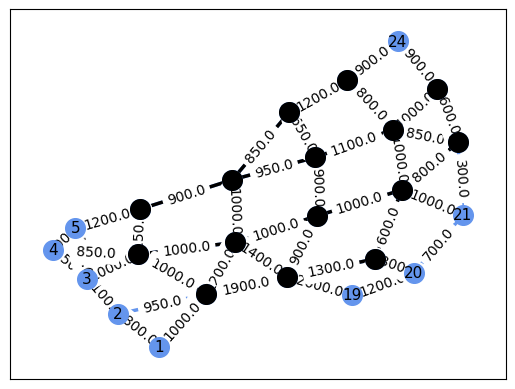

In [29]:
def visao_ISP(pos, topology, ISP_node_list, ISP_edge_list, global_vision=True, weight = False):

    color = (0/255,0/255,0/255)
    blue = (100/255,149/255,237/255)
    
    

    if global_vision:
        nx.draw_networkx_nodes(topology, pos, node_size=200, node_color=blue)    
        nx.draw_networkx_edges(topology, pos, node_size=200, edge_color=blue, width=2.5)
    nx.draw_networkx_nodes(topology, pos, nodelist=ISP_node_list, node_size=200, node_color=color)
    nx.draw_networkx_edges(topology, pos, node_size=200, edgelist=ISP_edge_list, edge_color=color, width=2.5)
    nx.draw_networkx_labels(topology, pos, font_size=11, font_family="sans-serif")

    if weight:
        edge_labels = nx.get_edge_attributes(topology, 'weight')
        nx.draw_networkx_edge_labels(topology, pos, edge_labels=edge_labels)

    print(ISP_node_list)

index = 2
gv = True
pos = nx.spring_layout(topology, seed=7)
visao_ISP(pos, topology, ISP_dict[index]["nodes"], ISP_dict[index]["edges"], global_vision=gv, weight=True)

In [11]:
def scramble_dict_keys(d):
    # Extract keys and values
    keys = list(d.keys())
    values = list(d.values())

    # Shuffle the keys
    np.random.shuffle(keys)

    # Create a new dictionary with scrambled keys but original values
    scrambled_dict = {keys[i]: values[i] for i in range(len(keys))}
    return scrambled_dict

{0: {'nodes': [11, 6, 9, 19, 15, 12, 1, 2, 7, 10, 20, 16, 13, 3, 4, 8, 14, 21], 'edges': [(11, 6), (11, 9), (11, 19), (11, 15), (11, 12), (6, 9), (6, 1), (6, 2), (6, 7), (9, 12), (9, 7), (9, 10), (19, 20), (15, 20), (15, 16), (12, 16), (12, 13), (1, 2), (2, 3), (7, 3), (7, 4), (7, 8), (10, 13), (10, 8), (10, 14), (20, 21), (16, 21), (13, 14), (3, 4)]}, 1: {'nodes': [2, 1, 3, 6, 7, 4, 5, 9, 11, 12], 'edges': [(2, 1), (2, 3), (2, 6), (1, 6), (3, 7), (3, 4), (3, 5), (6, 7), (6, 9), (6, 11), (7, 4), (7, 9), (4, 5), (9, 11), (9, 12), (11, 12)]}, 2: {'nodes': [20, 15, 19, 21, 11, 16, 22, 12, 17, 23, 6, 12], 'edges': [(20, 15), (20, 19), (20, 21), (15, 11), (15, 16), (19, 11), (21, 16), (21, 22), (11, 12), (11, 6), (11, 12), (16, 22), (16, 12), (16, 17), (16, 12), (22, 17), (22, 23), (17, 23)]}, 3: {'nodes': [9, 6, 7, 10, 11, 12, 1, 2, 3, 4, 8, 13, 14, 19, 15, 16, 21], 'edges': [(9, 6), (9, 7), (9, 10), (9, 11), (9, 12), (6, 7), (6, 11), (6, 1), (6, 2), (7, 3), (7, 4), (7, 8), (10, 8), (10, 1

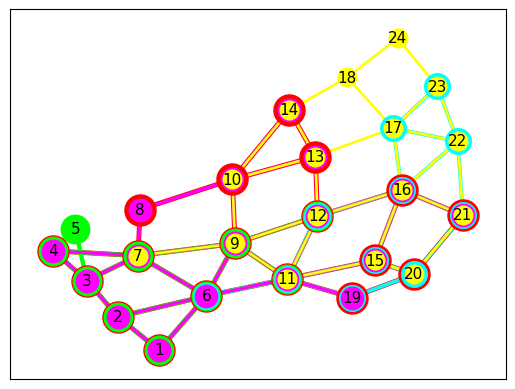

In [12]:
def visao_todas_ISPs(pos, topology, ISP_dict:dict, colors = [ (255/255,0/255,0/255), (0/255,255/255,0/255), (0/255,255/255,255/255), (255/255,0/255,255/255), (255/255,255/255,0/255)]):
    blue = (100/255,149/255,237/255)

    node_size = 500
    node_range = 400

    edge_width = 3.5
    edge_range = 2
    print(ISP_dict)
    #nx.draw_networkx_nodes(topology, pos, node_size=node_size, node_color=blue)
    #nx.draw_networkx_edges(topology, pos, edge_color=blue, width=edge_width)
    #ISP_dict = scramble_dict_keys(ISP_dict)
    #print(ISP_dict)
    for i, key in enumerate(ISP_dict.keys()):
            
            ISP_node_list = ISP_dict[key]["nodes"]
            ISP_edge_list = ISP_dict[key]["edges"]

            color = (np.random.rand(), np.random.rand(), np.random.rand())
            
            nx.draw_networkx_nodes(topology, pos, nodelist=ISP_node_list, node_size=(node_size-(i*node_range/len(ISP_dict))), node_color=colors[i])
            
            nx.draw_networkx_edges(topology, pos, node_size=200, edgelist=ISP_edge_list, edge_color=colors[i], width=(edge_width-(i*edge_range/len(ISP_dict))))
            print(ISP_node_list)
            
    nx.draw_networkx_labels(topology, pos, font_size=11, font_family="sans-serif")
    

pos = nx.spring_layout(topology, seed=7)
visao_todas_ISPs(pos, topology, ISP_dict)


{0: {'nodes': [], 'edges': [(5, 8)]}, 1: {'nodes': [5, 18, 24], 'edges': [(3, 5), (4, 5), (13, 17), (14, 18), (17, 18), (18, 24), (23, 24)]}, 2: {'nodes': [8, 17, 22, 23], 'edges': [(7, 8), (8, 10), (19, 20), (16, 22), (16, 17), (17, 23), (17, 22), (22, 21), (22, 23)]}, 3: {'nodes': [1, 2, 3, 4, 10, 13, 14, 19, 20], 'edges': [(1, 2), (1, 6), (2, 3), (2, 6), (6, 7), (6, 9), (3, 7), (3, 4), (7, 4), (9, 10), (11, 19), (10, 13), (10, 14), (12, 13), (13, 14), (15, 20), (20, 21)]}, 4: {'nodes': [6, 7, 9, 15, 16, 21], 'edges': [(6, 11), (7, 9), (9, 11), (9, 12), (11, 15), (12, 16), (15, 16), (16, 21)]}, 5: {'nodes': [11, 12], 'edges': [(11, 12)]}}
{0: {'nodes': [], 'edges': [(5, 8)]}, 1: {'nodes': [5, 18, 24], 'edges': [(3, 5), (4, 5), (13, 17), (14, 18), (17, 18), (18, 24), (23, 24)]}, 2: {'nodes': [8, 17, 22, 23], 'edges': [(7, 8), (8, 10), (19, 20), (16, 22), (16, 17), (17, 23), (17, 22), (22, 21), (22, 23)]}, 3: {'nodes': [1, 2, 3, 4, 10, 13, 14, 19, 20], 'edges': [(1, 2), (1, 6), (2, 3),

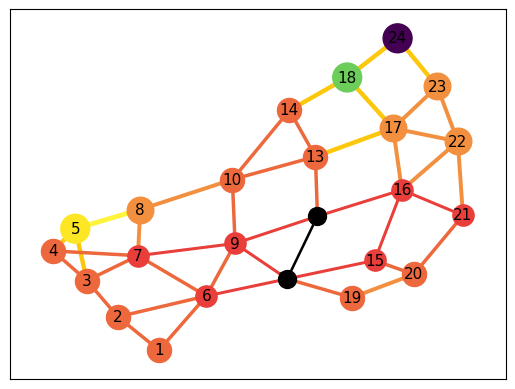

In [13]:

heatmap = determine_interssection(topology, ISP_dict)
colors = [(255/255,243/255,59/255), (253/255,199/255,12/255), (243/255,144/255,63/255), (237/255,104/255,60/255), (233/255,62/255,58/255), (0,0,0)]
visao_todas_ISPs(pos, topology, heatmap, colors)

[11, 12]


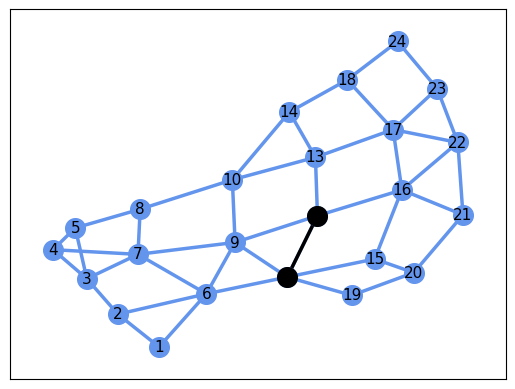

In [14]:
num = 5
visao_ISP(pos, topology, heatmap[num]["nodes"], heatmap[num]["edges"], True)

In [15]:
def disaster_generator(topology):
    disaster_center = np.random.choice(heatmap[5]["nodes"], 1)
    edges = list(topology.edges(disaster_center))
    index_list = [i for i in range(len(edges))]

    random_index = np.random.choice(index_list, len(index_list), replace=False)
    random_index = random_index[:max(random_index[0],3)]

    random_edges = [edges[i] for i in random_index]
    
    tempos = [ np.random.normal(600, 90) for i in range( len(random_edges)+len(disaster_center))]
    min_value = min(tempos)
    tempos_finais = [ x - min_value for x in tempos]
    duration = np.random.normal(600, 90)

    NODE_POINTS = [ [element, tempos_finais[i]] for i, element in enumerate(disaster_center)]
    LINK_POINTS = [ [x, y, tempos_finais[i + len(disaster_center)]] for i, (x,y) in enumerate(random_edges)]

    SORTED_NODE_POINTS = sorted(NODE_POINTS, key=lambda x: x[1])
    SORTED_LINK_POINTS = sorted(LINK_POINTS, key=lambda x: x[2])

    return {"nodes":SORTED_NODE_POINTS, "links":SORTED_LINK_POINTS, "duration":duration, "start":min_value}

disaster = disaster_generator(topology)

In [16]:
disaster

{'nodes': [[11, 34.62996816861158]],
 'links': [[11, 6, 0.0],
  [11, 9, 91.41267318316949],
  [11, 15, 209.2716207069913]],
 'duration': 689.1985868550814,
 'start': 458.94198703124624}

In [21]:
for key in ISP_dict.keys():
    
    ISP_dict[key]["databases_migration"] = {}
    for node in disaster["nodes"]:
        all_distances = nx.single_source_dijkstra_path_length(topology, node[0])
        ISP_distances = { key2:all_distances[key2] for key2 in ISP_dict[key]["nodes"]}
        most_distant_node = max(ISP_distances, key=ISP_distances.get)
        database = (node[0], most_distant_node)
        print(database)
        ISP_dict[key]["databases_migration"]["source"] = node[0]
        ISP_dict[key]["databases_migration"]["destination"] = node[1]
        ISP_dict[key]["databases_migration"]["size"] = np.random.normal(40000, 5000)
        
        ISP_dict[key]["reaction_time"] = np.random.normal(60, 20)

(11, 3)
(11, 5)
(11, 23)
(11, 3)
(11, 24)


In [22]:
ISP_dict

{0: {'nodes': [11, 6, 9, 19, 15, 12, 1, 2, 7, 10, 20, 16, 13, 3, 4, 8, 14, 21],
  'edges': [(11, 6),
   (11, 9),
   (11, 19),
   (11, 15),
   (11, 12),
   (6, 9),
   (6, 1),
   (6, 2),
   (6, 7),
   (9, 12),
   (9, 7),
   (9, 10),
   (19, 20),
   (15, 20),
   (15, 16),
   (12, 16),
   (12, 13),
   (1, 2),
   (2, 3),
   (7, 3),
   (7, 4),
   (7, 8),
   (10, 13),
   (10, 8),
   (10, 14),
   (20, 21),
   (16, 21),
   (13, 14),
   (3, 4)],
  'databases_destination': [(11, 3)],
  'reaction_time': 44.526981355065516},
 1: {'nodes': [2, 1, 3, 6, 7, 4, 5, 9, 11, 12],
  'edges': [(2, 1),
   (2, 3),
   (2, 6),
   (1, 6),
   (3, 7),
   (3, 4),
   (3, 5),
   (6, 7),
   (6, 9),
   (6, 11),
   (7, 4),
   (7, 9),
   (4, 5),
   (9, 11),
   (9, 12),
   (11, 12)],
  'databases_destination': [(11, 5)],
  'reaction_time': 68.42944826168677},
 2: {'nodes': [20, 15, 19, 21, 11, 16, 22, 12, 17, 23, 6, 12],
  'edges': [(20, 15),
   (20, 19),
   (20, 21),
   (15, 11),
   (15, 16),
   (19, 11),
   (21, 16),
   

In [18]:

def node_and_link_to_ISP( topology, ISP_dict):

    node_dict = {node:[] for node in topology.nodes()}
    edge_dict = {edges:[] for edges in topology.edges()}
    
    for key in ISP_dict.keys():

        for node in ISP_dict[key]["nodes"]:
            node_dict[node].append(key)
        for edge in ISP_dict[key]["edges"]:
            if edge in edge_dict.keys():
                edge_dict[edge].append(key)
            elif (edge[1], edge[0]) in edge_dict.keys():
                edge_dict[(edge[1], edge[0])].append(key)

    return {"nodes":node_dict, "edges":edge_dict}
teste = node_and_link_to_ISP(topology, ISP_dict)

In [19]:
teste

{'nodes': {1: [0, 1, 3],
  2: [0, 1, 3],
  6: [0, 1, 2, 3],
  3: [0, 1, 3],
  7: [0, 1, 3, 4],
  4: [0, 1, 3],
  5: [1],
  8: [0, 3],
  9: [0, 1, 3, 4],
  11: [0, 1, 2, 3, 4],
  10: [0, 3, 4],
  12: [0, 1, 2, 2, 3, 4],
  13: [0, 3, 4],
  14: [0, 3, 4],
  19: [0, 2, 3],
  15: [0, 2, 3, 4],
  16: [0, 2, 3, 4],
  17: [2, 4],
  18: [4],
  20: [0, 2, 4],
  22: [2, 4],
  21: [0, 2, 3, 4],
  23: [2, 4],
  24: [4]},
 'edges': {(1, 2): [0, 1, 3],
  (1, 6): [0, 1, 3],
  (2, 3): [0, 1, 3],
  (2, 6): [0, 1, 3],
  (6, 7): [0, 1, 3],
  (6, 9): [0, 1, 3],
  (6, 11): [0, 1, 2, 3],
  (3, 7): [0, 1, 3],
  (3, 4): [0, 1, 3],
  (3, 5): [1],
  (7, 4): [0, 1, 3],
  (7, 9): [0, 1, 3, 4],
  (7, 8): [0, 3],
  (4, 5): [1],
  (5, 8): [],
  (8, 10): [0, 3],
  (9, 10): [0, 3, 4],
  (9, 11): [0, 1, 3, 4],
  (9, 12): [0, 1, 3, 4],
  (11, 19): [0, 2, 3],
  (11, 15): [0, 2, 3, 4],
  (11, 12): [0, 1, 2, 2, 3, 4],
  (10, 13): [0, 3, 4],
  (10, 14): [0, 3, 4],
  (12, 13): [0, 3, 4],
  (12, 16): [0, 2, 2, 3, 4],
  (13, 14

In [17]:
src_ISP = np.random.choice( teste["nodes"][15])
dst_ISP = np.random.choice( teste["nodes"][20])

print(src_ISP)
print(dst_ISP)

4
2


In [18]:

def return_topology_after_simulation(topology, disaster, ISP_dict):
    env = simpy.Environment()
    rate = NUM_OF_REQUESTS / HOLDING_TIME
    simulador = Simulador(env, topology, 40, ISP_dict, disaster)
    env.run(until=900)
    return simulador

simulador = return_topology_after_simulation(topology, disaster, ISP_dict)

{1: [], 2: [], 6: [], 3: [], 7: [], 4: [], 5: [], 8: [], 9: [], 11: [], 10: [], 12: [], 13: [], 14: [], 19: [], 15: [], 16: [], 17: [], 18: [], 20: [], 22: [], 21: [], 23: [], 24: []}
dict_keys([(1, 2), (1, 6), (2, 3), (2, 6), (6, 7), (6, 9), (6, 11), (3, 7), (3, 4), (3, 5), (7, 4), (7, 9), (7, 8), (4, 5), (5, 8), (8, 10), (9, 10), (9, 11), (9, 12), (11, 19), (11, 15), (11, 12), (10, 13), (10, 14), (12, 13), (12, 16), (13, 14), (13, 17), (14, 18), (19, 20), (15, 16), (15, 20), (16, 22), (16, 21), (16, 17), (17, 18), (17, 23), (17, 22), (18, 24), (20, 21), (22, 21), (22, 23), (23, 24)])
.

[]


..........

[4063, 4062, 4061, 4060, 4059, 4058, 4057, 4056, 4055, 4054, 4053, 4052, 4051, 4050, 4049, 4048, 4047, 4046, 4045, 4043, 4042, 4041, 4040, 4039, 4038, 4036, 4035, 4033, 4032, 4031, 4030, 4029, 4028, 4027, 4026, 4025, 4024, 4023, 4022, 4021, 4020, 4019, 4018, 4017, 4016, 4015, 4014, 4013, 4012, 4011, 4010, 4009, 4008, 4007, 4006, 4005, 4004, 4003, 4002, 4001, 4000, 3999, 3998, 3997, 39

In [19]:
df = pd.DataFrame(simulador.req).transpose()

In [33]:
df

,num,class,num_slots,path,path_length,spectro,tempo_criacao,tempo_desalocacao,distacia,bandwidth,blocked,source_ISP,destination_ISP
1,1,3,24,"[6, 9, 12, 16, 22, 23]",6,"[0, 23]",0.015128,0.11648,4600,300,False,4,1
2,2,2,20,"[16, 12, 9, 6]",4,"[24, 43]",0.043125,0.16345,3200,250,False,1,4
3,3,2,16,"[3, 7, 9, 10, 14]",5,"[0, 15]",0.047344,0.071634,3850,200,False,0,0
4,4,3,24,"[9, 12, 16, 22]",4,"[44, 67]",0.058698,0.401548,2800,300,False,0,3
5,5,3,20,"[9, 12, 16]",3,"[68, 77]",0.073215,0.710501,2000,250,False,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32100,32100,2,12,"[10, 13, 17]",3,"[65, 71]",799.891836,800.166754,2050,150,False,3,2
32101,32101,2,24,"[18, 14, 10, 9, 7, 4, 5]",7,"[14, 14]",799.902512,800.335221,5700,300,False,0,4
32102,32102,3,12,"[11, 19]",2,"[0, 11]",799.970934,800.528592,2600,150,False,3,3
32103,32103,3,32,"[16, 15, 11, 6, 2]",5,"[40, 50]",799.983898,800.310357,4750,400,False,1,3


In [32]:
df[df["blocked"] == True]

,num,class,num_slots,path,path_length,spectro,tempo_criacao,tempo_desalocacao,distacia,bandwidth,blocked,source_ISP,destination_ISP
26,26,3,32,None,None,None,0.59046,None,None,400,True,0,0
83,83,3,8,None,None,None,2.04945,None,None,100,True,4,4
84,84,3,20,None,None,None,2.070465,None,None,250,True,4,4
86,86,3,32,None,None,None,2.108721,None,None,400,True,0,1
108,108,2,12,None,None,None,2.599001,None,None,150,True,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32008,32008,1,28,None,None,None,797.55771,None,None,350,True,0,0
32050,32050,3,28,None,None,None,798.716454,None,None,350,True,4,2
32065,32065,2,28,None,None,None,799.02903,None,None,350,True,4,3
32084,32084,2,28,None,None,None,799.456681,None,None,350,True,4,0


In [34]:
for u, k in list(simulador.topology.edges):
    for slots in simulador.topology[10][13]["capacity"]:
        if slots == 1:
            print( f"({u}, {k})")

In [ ]:

TEMPO_DE_ANTECEDENCIA = 10 #minutos
#4 provedores medios, se cumunicam com o provedor de infra instrutura em momentos diferentes
LINK_POINTS = [[6,9,1],[9,11,3],[7,9,6],[9,12,6],[9,10,9],[6,7,9],[11,12,9]]

#pontos de falha = no, tempo [[4,2], [2,5]]
NODE_POINTS = [[9,9]]

DATABASES = [ [4, 23,  30000], [3, 22, 30000], [2, 21, 30000]]


In [ ]:
simulador.topology.edges

In [ ]:
print(simulador.topology[10][13]["capacity"])

In [ ]:
def selecionaCaminhosBruteForce():
    pass

In [ ]:
def selecionaCaminho():
    pass

In [ ]:
MOMENTODESASTRELINK = 2
MOMENTODESASTRENODE = 1
def pinta_grafo(topology: Graph, momento:int = LINK_POINTS[-1][-1]):
    copiatopo = topology.copy()
    blue = (100/255,149/255,237/255)
    colors = [ (1,0,0), (0,1,0), (0,0,1), (0.5, 0.8, 0.1)]

    links_a_serem_removidos = []
    nodes_a_serem_removidos = []
    
    for link in LINK_POINTS:
        if link[MOMENTODESASTRELINK] > momento:
            break
        links_a_serem_removidos.append(link)

    for node in NODE_POINTS:
        if node[MOMENTODESASTRENODE] > momento:
            break
        nodes_a_serem_removidos.append(node[0])
    pos = nx.spring_layout(copiatopo, seed=7)
    
    #copiatopo.remove_edges_from(links_a_serem_removidos)
    #copiatopo.remove_nodes_from(nodes_a_serem_removidos)
    
    
    nx.draw_networkx_nodes(copiatopo, pos, node_size=200, node_color=blue)

    for i, node in enumerate(DATABASES):
        nx.draw_networkx_nodes(copiatopo, pos,nodelist=node[:2], node_size=200, node_color=colors[i])

    nx.draw_networkx_edges(copiatopo, pos, node_size=200, edge_color=blue, width=2.5)
    nx.draw_networkx_labels(copiatopo, pos, font_size=11, font_family="sans-serif")
    

    paths_available = {}
    for database in DATABASES:
        key = (database[0], database[1])
        paths_available[key] = []
        for path in k_paths[key]:
            validPath = True
            for i in range( 0, len(path)-1):
                if not copiatopo.has_edge(path[i],path[i+1]):
                    validPath = False
                    break
            if (validPath):
                paths_available[key].append(path)
    
    caminhos_finais = {}
    # caminhos_finais = selecionaCaminhos()
    for key, paths in paths_available.items():
        first_path = paths[0]  # Selecting only the first path
        edges = [(first_path[i], first_path[i+1]) for i in range(len(first_path)-1)]
        caminhos_finais[key] = edges


    for i, key in enumerate(caminhos_finais):
        nx.draw_networkx_edges(copiatopo, pos, node_size=200,edgelist=caminhos_finais[key], edge_color=colors[i], width=2.5)


    for (src, dest) in copiatopo.edges:
        soma = 0
        for slot in copiatopo[src][dest]["capacity"]:
            if slot == 0:
                soma += 1
        copiatopo[src][dest]["livre"] = soma
    edge_labels = nx.get_edge_attributes(copiatopo, "livre")
    nx.draw_networkx_edge_labels(copiatopo, pos, edge_labels, font_size=5)
    

    return (copiatopo, caminhos_finais)
    
pinta_grafo(topology, 9)

In [ ]:
k_paths[(4,23)]